In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names, but [a-zA-Z]+ was fitted with feature names", category=UserWarning)
                                  
warnings.filterwarnings = lambda *a, **kw: None
from IPython.core.display import HTML

HTML(open("custom.html", "r").read())

# Chapter 4: Metrics for evaluating the performance of a classifier

In [2]:
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Up to now we used *accuracy*, the percentage of correct classifcations, to evaluate the quality of a classifier.

Regrettably _accuracy_ can produce very misleading results. 

This chapter will discuss other metrics used to asses the quality of a classifier, including the possible pitfalls.

##  The confusion matrix

Before we define the **confusion matrix** we must introduce some additional terms. 


After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
        </tr>
    </tbody>
</table>

</div>

<a href='https://imgflip.com/i/305c8j'><img src="./images/305c8j.jpg" width=40%/></a><br/><a href='https://imgflip.com/gif-maker'> via Imgflip GIF Maker</a> 




- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.



<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>



## Pitfalls

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; Accuracy can be very misleading if class sizes are imbalanced
</div>


Let us demonstrate this with an extreme example:

- On average 10 out of 10000 people are infected with a disease `X`. 
- A medical test `Z` diagnoses 50 % of infected people as `not infected` ?
- The test is correct on all  not-infected people.


Among $10000$ people 

- $10$ will be infected, $5$ gets a correct result.
- $9990$ will be not infected with a correct test result.

Thus accuracy is $\frac{9995}{10000} = 99.95 \% $


This is also called the **accuracy paradox** (<a href="https://en.wikipedia.org/wiki/Accuracy_paradox">see also here</a>).

<a href='https://imgflip.com/i/303wyp'><img src="./images/303wyp.jpg" width=50%/></a><br/><a href='https://imgflip.com/gif-maker'> via Imgflip GIF Maker</a> 


To evaluate this test on such an unbalanced dataset we need different numbers: 

1. Does our test miss infected people: How many infected people are actually discovered to be infected ?

2. Does our test predict people as infected which are actually not: How many positive diagnoses are correct ?

We come back to this example later.

## Exercise block 1

1.  A classifier predicts labels `[0, 1, 0, 1, 1, 0, 1, 0]` whereas true labels are `[0, 0, 1, 1, 1, 0, 1, 1]`. First write these values as a two columned table using pen & paper and assign `FP`, `TP`, ... to each row. Now create the confusion matrix and compute accuracy.

2. A random classfier just assign a randomly chosen label `0` or `1` to a given sample. What is the average accuracy of such a classifier?

### Optional exercise

Assume the previously described test also produces wrong results on not-infected people, such that 5% will be diagnosed as infected. Compute the confusion matrix and the accuracy of this test.



##  Precision and Recall


A few days before thanksgiving you open an online recipe website and enter "turkey thanksgiving". You see some suitable recommendations but also unusable results related to Turkish recipes.

Such a search engine works like a filter applied on a collection of documents.

As a scientist you want to assess the reliablity of this service:

1. What fraction of relevant recipes stored in the underlying database do I see?

2. How many of the shown results are relevant recipes and not the recipes from Turkey?

<img src="./images/precision-recall-1.png" width=90% />

### How to compute precision and recall for a classifier

To transfer this concept to classification, we can interpret a classifier as a filter. The classifier classifies every  document in a collection as relevant or not relevant.


<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

To remember:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
        </tr>
    </tbody>
</table>

</div>

<img src="./images/precision-recall-2.png" width=90% />

<div style="font-size: 130%; font-weight: bold;">Example</div>

The confusion matrix for the medical test `Z` is then:


<table style="border: 1px solid black">
    <tr style="border: 1px black">
        <td style="border: 1px  solid black; background: white; padding: 1em">TP = 5</td>
        <td style="border: 1px  solid black; background: white; ">FP = 0</td>
    </tr>
    <tr style="border: 1px black">
        <td style="border: 1px solid black; background: white; padding: 1em ">FN = 5</td>
        <td style="border: 1px solid black; background: white; ">TN = 9990</td>
    </tr>
        
</table>

Here precision is `1.0` and recall is `0.5`.

### Trade-off between precision and recall.

We can **increase recall** by "opening" the classifier to show more results. In case of a linear classifier this could be done by decreasing the threshold.

The downside is that this would also increase the number of irrelevant results, thus **reduce precision**.

### F1-score

Sometimes we want a single number instead of two numbers to rank the performaces of multiple classifiers.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
    
The **F1 score** is computed as
<code>F1 = 2 * (precision * recall) / (precision + recall)</code>.

This is the *harmonic mean* of precision and recall.


</div>

For the medical test `Z` the `F1` score is `1 / 1.5 = 0.6666..`.

## Exercise block 2

Use your results from Exercise block 1.1 to compute precision, recall and F1 score.

### Optional exercise:

Compute precision, recall and F1-score for the test described in Exercise block 1 Optional exercise.

## Other metrics

The discussion above was just a quick introduction to measuring the accuracy of a classifier. We skipped other metrics such as `ROC` and `AUC` amongst others.

A good introduction to `ROC` <a href="https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/">can be found here.</a>

## Metrics in scikit-learn

`sklearn.metrics` contains all introduced above metrics, as well as the previously-used classification accuracy:

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# these numbers are from exercise 1.1:
predicted = [0, 1, 0, 1, 1, 0, 1, 0]
labels =  [0, 0, 1, 1, 1, 0, 1, 1]


# The first argument of the metrics functions is the exact labels, 
# the second argument is the predictions:
#

print("{:20s} {:.3f}".format("precision", precision_score(labels, predicted)))
print("{:20s} {:.3f}".format("recall", recall_score(labels, predicted)))
print("{:20s} {:.3f}".format("f1", f1_score(labels, predicted)))
print("{:20s} {:.3f}".format("accuracy", accuracy_score(labels, predicted)))


precision            0.750
recall               0.600
f1                   0.667
accuracy             0.625


### Classification report

`scikit-learn` also offers a function to print a classification report, which is an overview table of precision, recall and F1 metrics:

In [4]:
from sklearn.metrics import classification_report

print(classification_report(labels, predicted, ))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



1. The `support` column lists the number of samples in each class and in total.
2. The `macro average` row lists unweighted mean of a metric for each label. This does NOT take classes imbalance into account.
3. The `weighted average` row lists weighted by support mean of a metric for each label. This does take classes imbalance into account.

Note: normally the precision, recall and F1 metrics are only the "Positive" (`1`) class metrics (cf. results above).

### Confusion matrix

The `sklearn.metrics` module contains also `confusion_matrix` utility which returns the confusion matrix.

Beware: the matrix is transposed with respect to the conventional notation; actual (true) classes are given in rows, whereas predicted in columns.

In [5]:
from sklearn.metrics import confusion_matrix

# print confusion matrix nicely using pandas DataFrame
print(pd.DataFrame(
    
    # pass classes, here called labels, otherwise sort order (0, 1) will be used
    confusion_matrix(labels, predicted, labels=[1, 0]),

    # actual (true) classes are given in rows, whereas predicted in columns
    index=["Actual P", "Actual N"],
    columns=["Predicted P", "Predicted N"],
))
print()

          Predicted P  Predicted N
Actual P            3            2
Actual N            1            2



Having a classifier object, the confusion matrix can also be visualized using a `ConfusionMatrixDisplay` utility class.

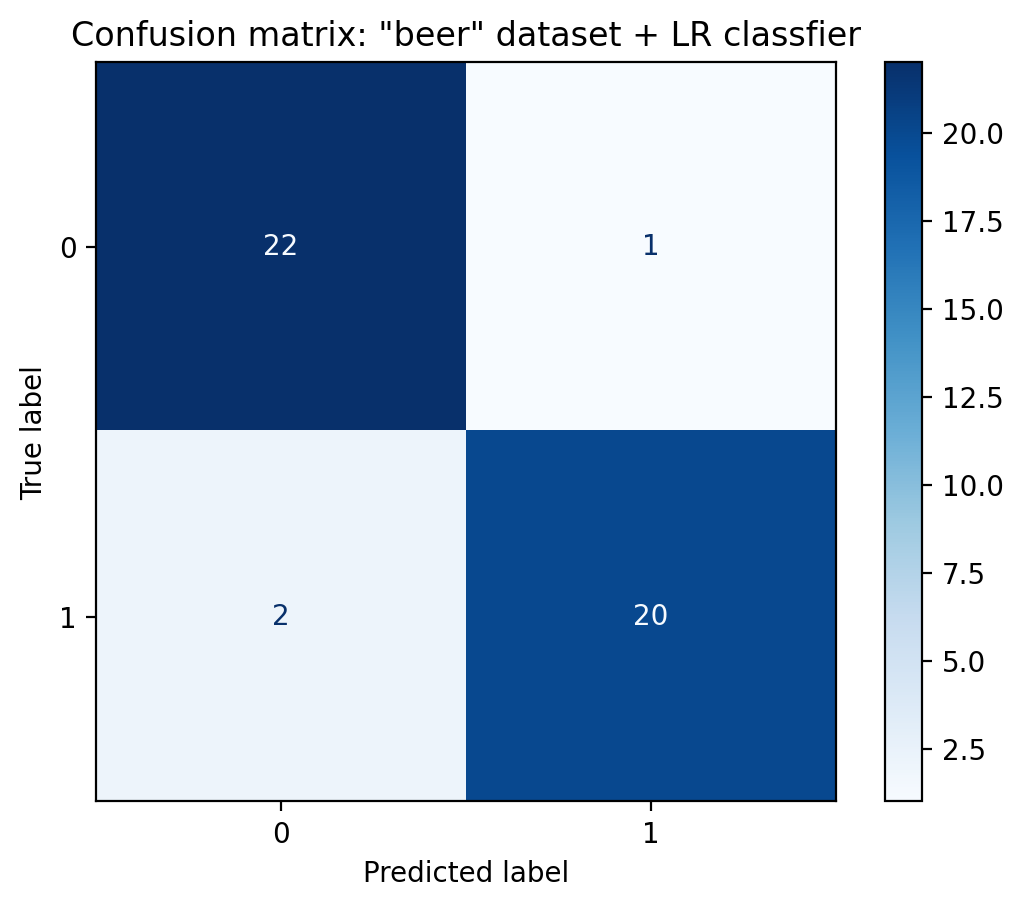

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

beer_data = pd.read_csv("data/beers.csv")

features = beer_data.iloc[:, :-1]
labels = beer_data.iloc[:, -1]

(
    features_train,
    features_test, 
    labels_train, 
    labels_test,

) = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

classifier = LogisticRegression(C=1)
classifier.fit(features_train, labels_train)

cm_disp = ConfusionMatrixDisplay.from_estimator(
    estimator=classifier,
    X=features_test,
    y=labels_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
)

cm_disp.ax_.set_title('Confusion matrix: "beer" dataset + LR classfier')
plt.show()

<div class="alert alert-block alert-info">
<p>
<i class="fa fa-info-circle"></i>
The confusion matrix generalizes directly to multiple classes (i.e. more than binary "Positive" and "Negative" class). For instance, using <code>sklearn.datasets.load_iris</code> with vanilla <code>SVC</code> one gets the following confusion matrix plot:
</p>
    
<img src="./images/confusion_matrix-iris_svc.png" width="50%" />

</div>

### Case-study: an imbalanced dataset

The function `cross_val_score` (introduced in the last script) allows to use other metrics than `accuracy`.

We demonstrate usage of different metrics on two data sets:

- the beer data samples in which labels distribution is almost 50:50, and
- an unbalanced subset of the beer data samples.

In [7]:
import pandas as pd

beer_data = pd.read_csv("data/beers.csv")
print("balanced data")
print(beer_data.shape)
print("#class 1:", sum(beer_data.iloc[:,-1] == 1))
print()

# we sort by label, then removing samples of one class is easy:
beer_data = beer_data.sort_values(by="is_yummy")

beer_data_unbalanced = beer_data.iloc[:-80, :]

print("unbalanced data")
print(beer_data_unbalanced.shape)
print("#class 1:", sum(beer_data_unbalanced.iloc[:,-1] == 1))

balanced data
(225, 5)
#class 1: 111

unbalanced data
(145, 5)
#class 1: 31


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


def assess(classifier, beer_data):
    features = beer_data.iloc[:, :-1]
    labels = beer_data.iloc[:, -1]
    n = len(labels)
    print("{:.1f} % of the beers are yummy".format(100 * sum(labels == 1) /n))
    print()
    
    # NOTE: metrics given in `cross_val_score` as strings (names).
    #       (In order to use metric functions, as these imported from `sklearn.metrics`,
    #       you need to transform them first into estimator scorer function using
    #       `sklearn.metrics.make_scorer()` function, e.g. `make_scorer(f1_score)`.)
    for metric in ["accuracy", "f1", "precision", "recall"]:
        scores = cross_val_score(classifier, features, labels, scoring=metric, cv=5)
        print("   {:12s}: mean value: {:.2f}".format(metric, scores.mean()))
    
    print()

    
classifier = LogisticRegression(C=1)

print("balanced data")
assess(classifier, beer_data)

print("unbalanced data")
assess(classifier, beer_data_unbalanced)

balanced data
49.3 % of the beers are yummy

   accuracy    : mean value: 0.86
   f1          : mean value: 0.85
   precision   : mean value: 0.90
   recall      : mean value: 0.81

unbalanced data
21.4 % of the beers are yummy

   accuracy    : mean value: 0.91
   f1          : mean value: 0.76
   precision   : mean value: 0.87
   recall      : mean value: 0.68



You can see that for the balanced data set the values for `f1` and for `accuracy` are almost equal, but differ significantly for the unbalanced data set. The `f1` metric captures the `precision` and `recall` trade off which is visible for imbalanced datasets.

## Exercise block 3

Play with the previous examples; for beer data try `SVC` classifier with different `C` and `gamma` settings.

### Optional exercise

Modify the code from section *Training the final classifier* from the previous script to find best hyperparameters for the beers data set, but this time use a `f1` metric. How did the previously best hyperparameters do now?


Copyright (C) 2019-2022 ETH Zurich, SIS ID